<a href="https://colab.research.google.com/github/keethu12345/TDS/blob/main/Week_5_Graded_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Q1:

Get a list of all OpenAI models that were created before 15 May 2024. Sort the models as most recent first.

Evaluate the following statements and calculate the total number of points.

4 points if gpt-3.5-turbo was created on 2023-02-28
2 points if tts-1-hd is located at index 12 (with 0 being the first index in the list of models)
1 point if tts-1-hd-1106 was created 5 models before gpt-4-1106-vision-preview
What is the correct total of points?

In [1]:
import json
import requests
from google.colab import userdata
from datetime import datetime

api_key = userdata.get("AIPROXY_KEY")
PROXY_URL = 'https://aiproxy.sanand.workers.dev/openai/'
r = requests.get(f"{PROXY_URL}v1/models", headers={
    "Authorization": f"Bearer {api_key}"
})

filter_date = datetime(2024, 6, 25).timestamp()

# Filter and sort the models
filtered_models = sorted(
    [model for model in r.json()["data"] if model['created'] < filter_date],
    key=lambda x: x['created'],
    reverse=True
)

for model in filtered_models:
    model['created'] = datetime.utcfromtimestamp(model['created']).strftime('%d-%m-%Y')

filtered_models


[{'id': 'gpt-4o-2024-05-13',
  'object': 'model',
  'created': '10-05-2024',
  'owned_by': 'system'},
 {'id': 'gpt-4o',
  'object': 'model',
  'created': '10-05-2024',
  'owned_by': 'system'},
 {'id': 'gpt-4-turbo-2024-04-09',
  'object': 'model',
  'created': '08-04-2024',
  'owned_by': 'system'},
 {'id': 'gpt-4-turbo',
  'object': 'model',
  'created': '05-04-2024',
  'owned_by': 'system'},
 {'id': 'gpt-4-1106-vision-preview',
  'object': 'model',
  'created': '26-03-2024',
  'owned_by': 'system'},
 {'id': 'gpt-3.5-turbo-0125',
  'object': 'model',
  'created': '23-01-2024',
  'owned_by': 'system'},
 {'id': 'gpt-4-turbo-preview',
  'object': 'model',
  'created': '23-01-2024',
  'owned_by': 'system'},
 {'id': 'gpt-4-0125-preview',
  'object': 'model',
  'created': '23-01-2024',
  'owned_by': 'system'},
 {'id': 'text-embedding-3-large',
  'object': 'model',
  'created': '22-01-2024',
  'owned_by': 'system'},
 {'id': 'text-embedding-3-small',
  'object': 'model',
  'created': '22-01-20

In [19]:
points = 0

# Check if gpt-3.5-turbo was created on 2023-02-28
gpt_35_turbo_creation_date = '28-02-2023'
for model in filtered_models:
    if model['id'] == 'gpt-3.5-turbo' and model['created'].startswith(gpt_35_turbo_creation_date):
        points += 4

# Check if tts-1-hd is located at index 12
tts_1_hd_index = 12
if len(filtered_models) > tts_1_hd_index and filtered_models[tts_1_hd_index]['id'] == 'tts-1-hd':
    points += 2

# Check if tts-1-hd-1106 was created 5 models before gpt-4-1106-vision-preview
index_gpt_4_1106_vision_preview = None
for i, model in enumerate(filtered_models):
    if model['id'] == 'gpt-4-1106-vision-preview':
        index_gpt_4_1106_vision_preview = i
        break
if index_gpt_4_1106_vision_preview is not None and index_gpt_4_1106_vision_preview >= 5:
    if filtered_models[index_gpt_4_1106_vision_preview - 6]['id'] == 'tts-1-hd-1106':
        points += 1
# Print total points
print(f"Total Points: {points}")


Total Points: 6


###Q2:

Get a list of all OpenAI models that were created before 15 May 2024. Sort the models as most recent first.

Evaluate the following statements and calculate the total number of points.

4 points if tts-1-hd was created on 2023-11-03
2 points if gpt-4-0314 is located at index 25 (with 0 being the first index in the list of models)
1 point if text-embedding-3-small was created 22 models before gpt-3.5-turbo
What is the correct total of points?

In [21]:
# Evaluation of the statements
points = 0

# Check if tts-1-hd was created on 2023-11-03
tts_1_hd_creation_date = '03-11-2023'
for model in filtered_models:
    if model['id'] == 'tts-1-hd' and model['created'].startswith(tts_1_hd_creation_date):
        points += 4

# Check if gpt-4-0314 is located at index 25
gpt_4_0314_index = 25
if len(filtered_models) > gpt_4_0314_index and filtered_models[gpt_4_0314_index]['id'] == 'gpt-4-0314':
    points += 2

# Check if text-embedding-3-small was created 22 models before gpt-3.5-turbo
index_gpt_35_turbo = None
for i, model in enumerate(filtered_models):
    if model['id'] == 'gpt-3.5-turbo':
        index_gpt_35_turbo = i
        break

if index_gpt_35_turbo is not None and index_gpt_35_turbo >= 22:
    if filtered_models[index_gpt_35_turbo - 21]['id'] == 'text-embedding-3-small':
        points += 1

# Print total points
print(f"Total Points: {points}")

Total Points: 4


###Q3:

Here is a list of 20 attendees to a conference. Convert them into a JSON array of objects with these fields (consistent with vCard):

fn: Full name.
bday: Birthday (YYYY-MM-DD format)
email: Email address.
tel: Telephone number (nnn-nnn-nnnn format)
adr.country-name: Country. (Note that adr is an object and country-name is a key inside that)
org: Organization name.
title: Job title.
photo: Photograph.
url: URL.
nickname: Nickname.
You need to:

Create the JSON schema for the above structure.
Use OpenAI's tools (a.k.a. function calling) to generate the JSON array (in the same order) of objects in this schema.
Paste the array at https://tools-in-data-science.pages.dev/jsonvalidate and get the validation code. Retry with different prompts until you get one.
Question: What is the correct validation code?

Note: The validation will check the following:

Are there 20 objects in the array?
Are only the above fields present? (It's OK if some are missing)
Then it will:

Sort the keys within each array (the array order is preserved, and is important to align with the original data)
Remove all non-alphanumeric characters in the values (so it's OK if you get punctuation wrong)
Convert all values to lowercase (so it's OK if you get case wrong)
Convert to JSON and calculate the last 3 digits of the decimal value of the SHA256 hash. (Or whatever. Ignore this.)

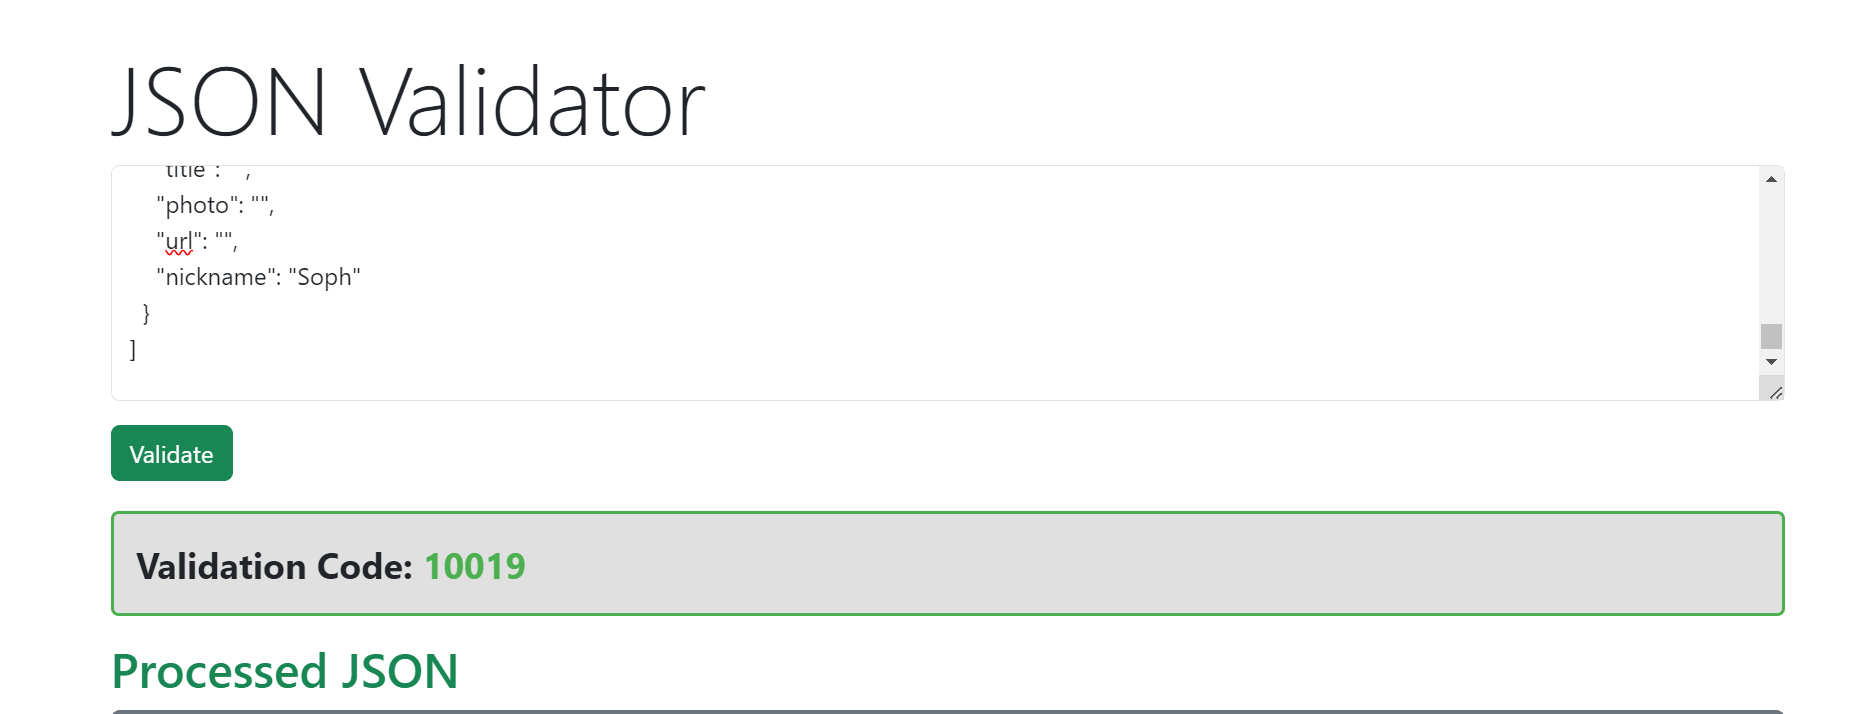

###Q4:

Here is a list of 20 attendees to a conference. Convert them into a JSON array of objects with these fields (consistent with vCard):

fn: Full name.
bday: Birthday (YYYY-MM-DD format)
email: Email address.
tel: Telephone number (nnn-nnn-nnnn format)
adr.country-name: Country. (Note that adr is an object and country-name is a key inside that)
org: Organization name.
title: Job title.
photo: Photograph.
url: URL.
nickname: Nickname.
You need to:

Create the JSON schema for the above structure.
Use OpenAI's tools (a.k.a. function calling) to generate the JSON array (in the same order) of objects in this schema.
Paste the array at https://tools-in-data-science.pages.dev/jsonvalidate and get the validation code. Retry with different prompts until you get one.


Question: What is the correct validation code?

Note: The validation will check the following:

Are there 20 objects in the array?
Are only the above fields present? (It's OK if some are missing)
Then it will:

Sort the keys within each array (the array order is preserved, and is important to align with the original data)
Remove all non-alphanumeric characters in the values (so it's OK if you get punctuation wrong)
Convert all values to lowercase (so it's OK if you get case wrong)
Convert to JSON and calculate the last 3 digits of the decimal value of the SHA256 hash. (Or whatever. Ignore this.)
Hint: This is a HARD exercise, since LLMs will likely make a mistake in just one or a few fields. Validate carefully.

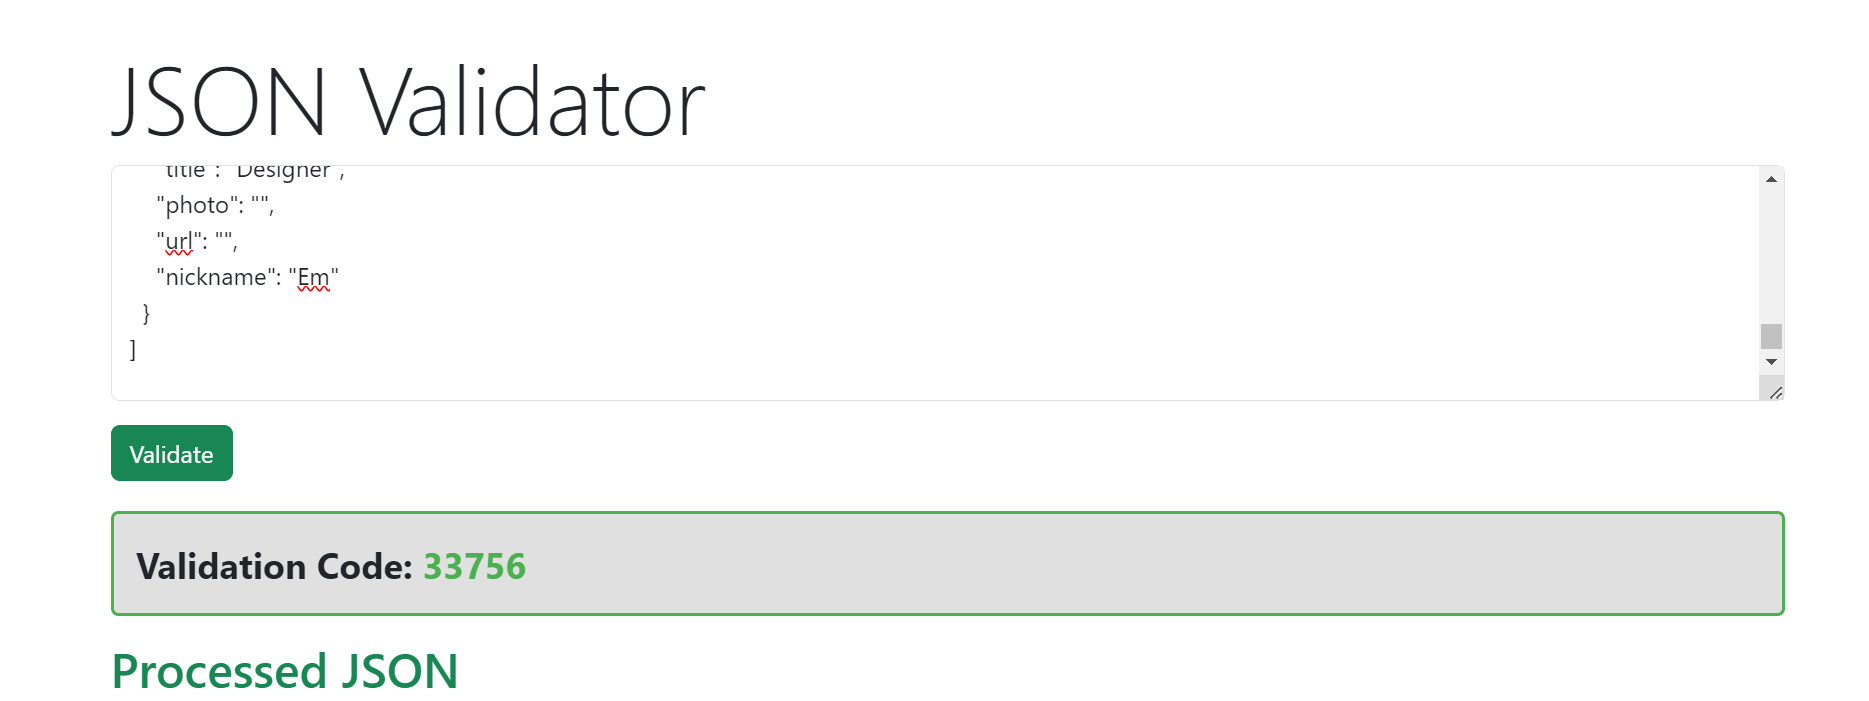

###Q5:

In the embedding vector of the word Learning using text-embedding-3-small, how many of the 1,536 values are greater than -0.003007378418357321?

In [24]:
import json
import requests
from google.colab import userdata
from datetime import datetime

api_key = userdata.get("AIPROXY_KEY")
PROXY_URL = 'https://aiproxy.sanand.workers.dev/openai/'

url = f"{PROXY_URL}v1/embeddings"
headers = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json"
}

word = "Learning"
value =  -0.003007378418357321
data = {
    "input": word,
    "model": "text-embedding-3-small",
    "encoding_format": "float"
}
response = requests.post(url, headers=headers, data=json.dumps(data))
embeddings = response.json()['data'][0]['embedding']

count = sum(1 for x in embeddings if x > value)
count

819

###Q6:

In the embedding vector of the word Talented using text-embedding-3-small, how many of the 1,536 values are greater than -0.019408089823470212?

In [25]:
import json
import requests
from google.colab import userdata
from datetime import datetime

api_key = userdata.get("AIPROXY_KEY")
PROXY_URL = 'https://aiproxy.sanand.workers.dev/openai/'

url = f"{PROXY_URL}v1/embeddings"
headers = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json"
}

word = "Talented"
value =  -0.019408089823470212
data = {
    "input": word,
    "model": "text-embedding-3-small",
    "encoding_format": "float"
}
response = requests.post(url, headers=headers, data=json.dumps(data))
embeddings = response.json()['data'][0]['embedding']

count = sum(1 for x in embeddings if x > value)
count

1175

###Q7:

What is the cosine similarity between the text-embedding-3-small embeddings of Available and Decision?

In [26]:
import numpy as np
import requests
import json
from google.colab import userdata

embeddings = {}
words = [ "Available", "Decision"]

api_key = userdata.get("AIPROXY_KEY")
PROXY_URL = 'https://aiproxy.sanand.workers.dev/openai/'
url = f"{PROXY_URL}v1/embeddings"
headers = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json"
}
data = {
    "input": words,
    "model": "text-embedding-3-small",
    "encoding_format": "float"
}

response = requests.post(url, headers=headers, data=json.dumps(data))


for word, embedding in zip(words, response.json()['data']):
    embeddings[word] = np.array(embedding['embedding'])

np.dot(embeddings[words[0]], embeddings[words[1]])

0.31795665496692327

###Q8:

Which of the following word lists has the highest average cosine similarity with the word Encourage using text-embedding-3-small?

In [28]:
import numpy as np
import requests
import json
from google.colab import userdata

embeddings = {}

target = "Encourage"
word_lists = {
    "A": ["Favorite", "Recovery", "Medicine", "Attention"],
    "B": ["Generation", "Economic", "Universe", "Solution"],
    "C": ["Generation", "Campaign", "Medicine", "Invention"],
    "D": ["Abundance", "Creative", "Marketing", "Beautiful"]
}

unique = list(set(word for words_list in word_lists.values() for word in words_list))
unique.append(target)

api_key = userdata.get("AIPROXY_KEY")
PROXY_URL = 'https://aiproxy.sanand.workers.dev/openai/'
url = f"{PROXY_URL}v1/embeddings"
headers = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json"
}
data = {
    "input": unique,
    "model": "text-embedding-3-small",
    "encoding_format": "float"
}

response = requests.post(url, headers=headers, data=json.dumps(data))


for word, embedding in zip(unique, response.json()['data']):
    embeddings[word] = np.array(embedding['embedding'])

average_similarities = {}

for key, word_list in word_lists.items():
    similarities = [np.dot(embeddings[target], embeddings[word]) for word in word_list if word != target]
    average_similarities[key] = np.mean(similarities)

max(average_similarities, key=average_similarities.get)

'A'

###Q9:

If you passed the following text to the gpt-3.5-turbo-0125 model, how many cents would the input (not output) cost, assuming that the cost per million input token is 50 cents? På en solig dag i juni, satt vi på stranden och njöt av värmen.

In [29]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


In [30]:
import tiktoken
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    encoding = tiktoken.encoding_for_model(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

input_text = "På en solig dag i juni, satt vi på stranden och njöt av värmen."
cost_per_million_tokens_cent = 50
tokens = num_tokens_from_string(input_text, "gpt-3.5-turbo-0125")
total_cost_cent = (tokens / 1_000_000) * cost_per_million_tokens_cent
total_cost_cent

0.00115